In [2]:
import math
import numpy as np
import sklearn.covariance
import pandas as pd
import seaborn
import graphviz
import matplotlib.pyplot as plt
% matplotlib inline

In [35]:
df = pd.read_csv('data/water-treatment.csv', header=None, na_values='?')
df = df.drop(df.columns[0], axis=1)
df[:5]

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


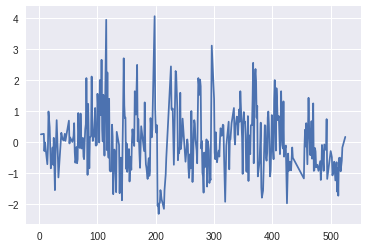

In [32]:
plt.plot(df[4])

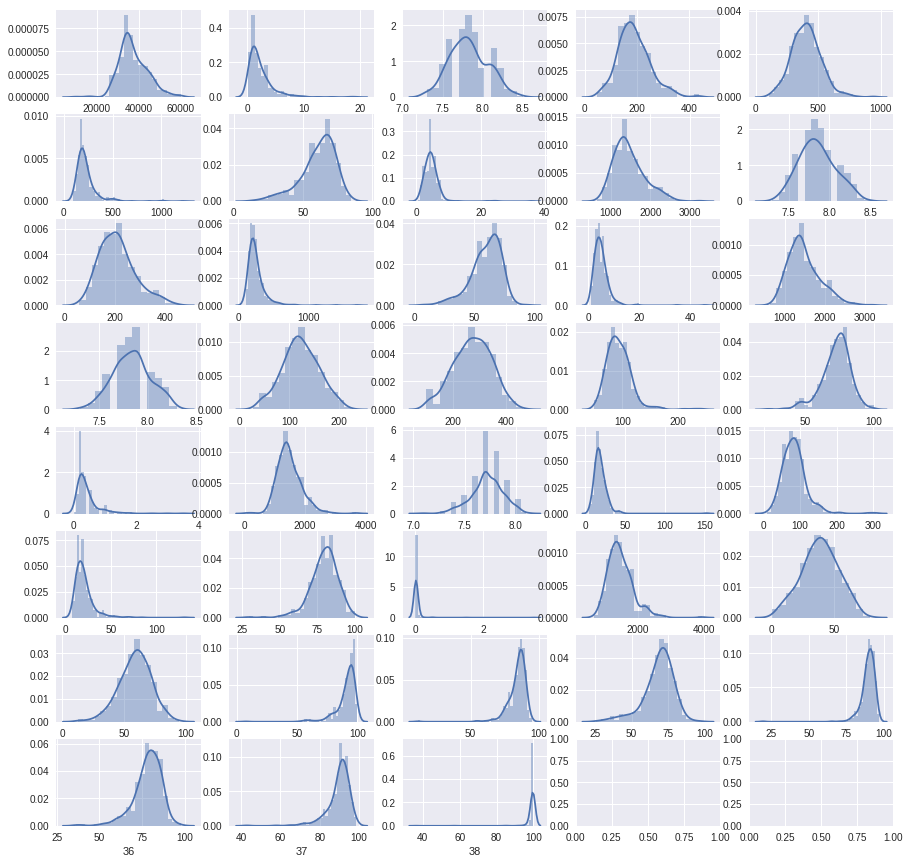

In [40]:
df = df.dropna()

f, axes = plt.subplots(8, 5, figsize=(15, 15))
for i in range(38):
    seaborn.distplot(df[i+1], ax=axes[int(i/5)][int(i%5)])

In [5]:
# seaborn.pairplot(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [12]:
mean = df.mean(axis=0)
var = df.var(axis=0)

for i in range(1, 39):
    df[i] = (df[i] - mean[i])/math.sqrt(var[i])

df[:5]

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
3,-0.342789,0.525093,0.315869,0.250450,1.561485,-0.294765,0.374517,-0.063891,2.442977,-0.227956,...,0.932863,-0.403717,0.409139,0.521996,0.460589,0.347041,0.123252,0.481069,-0.002119,0.207640
8,-1.199077,0.095652,-0.529415,0.266743,0.399040,-0.277827,0.650968,-0.063891,-0.557492,-0.674468,...,-0.373482,0.467183,-1.180861,0.207854,0.215397,-0.993873,0.490159,-0.551941,0.096486,0.062419
9,0.273558,-0.119068,-0.106773,-0.287239,0.865715,-0.227013,0.643069,0.108054,1.007529,-0.227956,...,0.349952,-1.200925,0.061808,0.017124,0.619242,-0.242581,-0.096892,-1.135287,-0.511577,0.110826
10,0.732863,-0.677341,0.315869,-0.010248,0.628135,0.027056,0.485097,0.280000,-0.148452,1.111580,...,0.243259,-2.580966,-1.011055,0.151757,-10.457656,-4.084632,-12.828564,-5.145796,-7.660418,-15.185756
14,0.518317,0.525093,-0.952057,-0.710873,-0.636129,-0.328641,-0.273166,-0.751675,-0.427920,-1.120981,...,0.165190,-0.430514,-1.975861,-0.072631,-0.217295,-0.699062,-0.463799,-0.843614,-1.875609,0.014013


In [21]:
model = sklearn.covariance.GraphLasso(alpha=0.8, verbose=True)
model.fit(df)

[graph_lasso] Iteration   0, cost  1.77e+02, dual gap 8.498e-01
[graph_lasso] Iteration   1, cost  1.77e+02, dual gap -6.783e-08


GraphLasso(alpha=0.8, assume_centered=False, enet_tol=0.0001, max_iter=100,
      mode='cd', tol=0.0001, verbose=True)

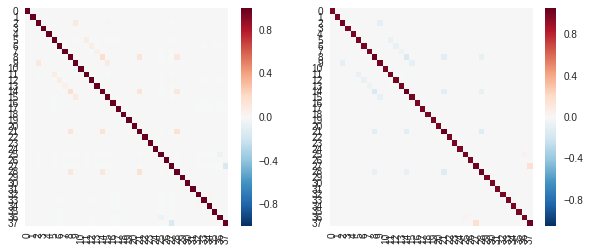

In [22]:
cov = model.covariance_
pre = model.precision_

f, axes = plt.subplots(1, 2, figsize=(10, 4))

seaborn.heatmap(cov, ax=axes[0])
seaborn.heatmap(pre, ax=axes[1])

In [ ]:
cov = np.cov(df, rowvar=0)
plt.figure(figsize=(6, 5))
seaborn.heatmap(cov)

In [23]:
import matgraph

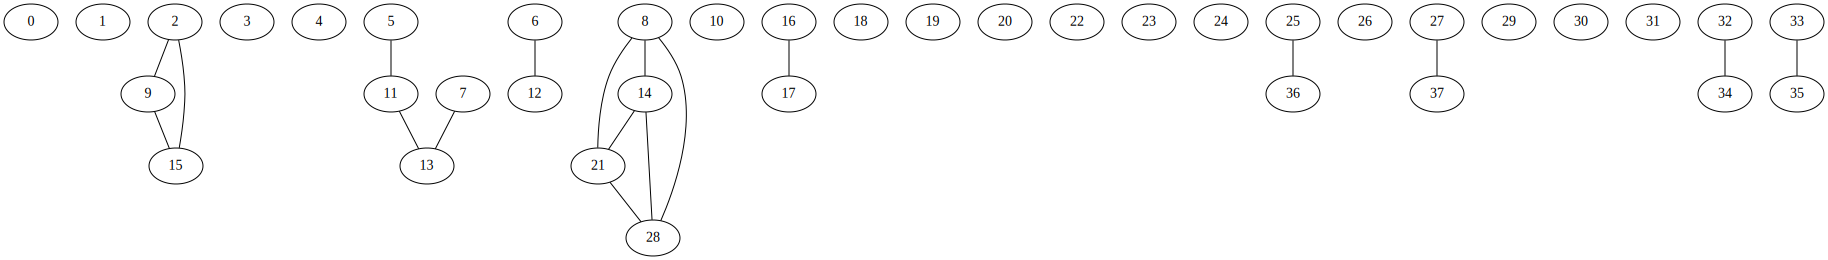

In [24]:
dot = matgraph.generate_graph(pre, legend='correlation')
dot.render('output/test')
dot

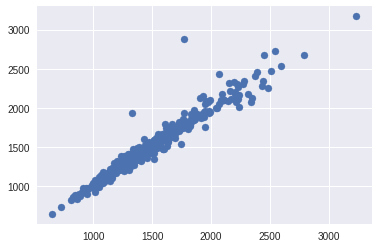

In [41]:
plt.scatter(df[9], df[15])